In [1]:
import pandas as pd
import numpy as np

# Read the cleaned file into a DataFrame
df = pd.read_csv('../data/bgg_rating_threshold.csv', sep=';', engine='c')

# Convert the 'bgg_user_rating' column to numeric
df['bgg_user_rating'] = ((pd.to_numeric(df['bgg_user_rating'], errors='coerce'))*10).astype(np.uint8)

print("done")

done


In [2]:
from scipy.sparse import coo_matrix
from sklearn.decomposition import TruncatedSVD
data = list(df.itertuples(index=False, name=None))
# Alternatively, you can use df['item'], df['user'], and df['review_score'] directly.

# Create unique mappings for items and users
unique_items = sorted(df['bgg_id'].unique())
unique_users = sorted(df['bgg_user_name'].unique())

item_to_index = {item: idx for idx, item in enumerate(unique_items)}
user_to_index = {user: idx for idx, user in enumerate(unique_users)}

# Prepare row indices, column indices, and data (review scores) using the DataFrame columns
rows = df['bgg_id'].map(item_to_index)
cols = df['bgg_user_name'].map(user_to_index)
scores = df['bgg_user_rating']

# Create a sparse matrix using the COO format:
sparse_matrix = coo_matrix(
    (scores, (rows, cols)),
    shape=(len(unique_items), len(unique_users))
)

# Optionally convert to CSR format for more efficient arithmetic operations
sparse_matrix = sparse_matrix.tocsr()
print ("Sparse matrix created with shape:", sparse_matrix.shape)

Sparse matrix created with shape: (15738, 411956)


In [ ]:
import csv

# Write the unique_items list to a CSV file
with open('../data/bgg_id.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([[item] for item in unique_items])

: 

In [ ]:
import matplotlib.pyplot as plt
# Define the number of components for SVD (adjust based on your application)
n_components = 2000  # This is a hyperparameter; change it to suit your needs

# Initialize and fit TruncatedSVD
svd = TruncatedSVD(n_components=n_components)
svd.fit(sparse_matrix)


In [ ]:
print(svd.explained_variance_ratio_.sum())

In [ ]:
feat = svd.transform(sparse_matrix)

In [ ]:
plt.loglog(svd.explained_variance_ratio_, marker='o')
variance = svd.explained_variance_ratio_

In [ ]:
# import sklearn.metrics
# cosine_sim =sklearn.metrics.pairwise.cosine_distances(feat)

In [ ]:
# import matplotlib.pyplot as plt

# # Flatten the cosine_sim matrix to a 1D array
# cosine_values = cosine_sim.flatten()

# # Create a histogram
# plt.hist(cosine_values, bins=50, color='blue', alpha=0.7)
# plt.title("Histogram of Cosine Similarity Values")
# plt.xlabel("Cosine Similarity")
# plt.ylabel("Frequency")
# plt.show()

In [ ]:
# # Set the diagonal to a high value to exclude it from the minimum search
# np.fill_diagonal(cosine_sim, np.inf)

# # Find the index of the minimum value
# min_index = np.unravel_index(np.argmin(cosine_sim), cosine_sim.shape)

# print("Index of minimum value (excluding diagonal):", min_index)
# unique_items[min_index[0]], unique_items[min_index[1]]
# print("Closest game", unique_items[min_index[0]], unique_items[min_index[1]])
# print("Distance", cosine_sim[min_index])
# # Set the diagonal to 0
# np.fill_diagonal(cosine_sim, 0)

In [ ]:
# # You need to install HDBSCAN first: pip install hdbscan
# import hdbscan

# # Example with a minimum cluster size parameter
# hdb = hdbscan.HDBSCAN()
# clusters = hdb.fit_predict(feat)

In [ ]:
# from sklearn.cluster import AgglomerativeClustering


# model = AgglomerativeClustering(
#     metric='precomputed',  # your cosine distance matrix
#     linkage='average',       # recommended with cosine distances
#     n_clusters=20        # set your desired number of clusters
# )
# clusters = model.fit_predict(cosine_sim)

In [ ]:
from sklearn.cluster import KMeans
k = 10  # Set the number of clusters; you can use techniques like the elbow method to choose k
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(feat)

In [ ]:
#2M
from sklearn.cluster import AffinityPropagation
k = 10  # Set the number of clusters; you can use techniques like the elbow method to choose k
aff = AffinityPropagation(random_state=42,verbose=True)
clusters = aff.fit_predict(feat)

In [ ]:
#5M
from sklearn.cluster import Birch
k = 10  # Set the number of clusters; you can use techniques like the elbow method to choose k
bir = Birch()
clusters = bir.fit_predict(cosine_sim)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


model = AgglomerativeClustering(
    linkage='ward',       # recommended with cosine distances
    n_clusters=10        # set your desired number of clusters
)
clusters = model.fit_predict(cosine_sim)

In [ ]:
#too much time
from sklearn.mixture import GaussianMixture
k = 3  # Set the number of clusters; you can use techniques like the elbow method to choose k
gau = GaussianMixture(verbose=20, n_components=k,max_iter=10)
clusters = gau.fit_predict(cosine_sim)

In [ ]:
# from sklearn.cluster import DBSCAN

# # Adjust eps (the neighborhood radius) and min_samples (minimum neighbors to form a dense region) as needed
# dbscan = DBSCAN(eps=1000, min_samples=5)
# clusters = dbscan.fit_predict(sparse_matrix)

In [28]:
from sklearn.cluster import SpectralClustering
# Convert cosine distance to similarity


model = SpectralClustering(
    n_clusters=10
)
clusters = model.fit_predict(feat)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np

# Suppose D is your cosine distance matrix (a square numpy array)
mds = MDS(verbose=20, dissimilarity="precomputed", random_state=42,max_iter=10)
latent_2d = mds.fit_transform(cosine_sim)

In [ ]:
import umap.umap_ as UMAP
import matplotlib.pyplot as plt

umapResult = UMAP.UMAP(n_components=2)
latent_2d = umapResult.fit_transform(feat)

{np.int32(0): np.int64(190), np.int32(1): np.int64(10770), np.int32(2): np.int64(419), np.int32(3): np.int64(747), np.int32(4): np.int64(613), np.int32(5): np.int64(334), np.int32(6): np.int64(404), np.int32(7): np.int64(741), np.int32(8): np.int64(1114), np.int32(9): np.int64(406)}


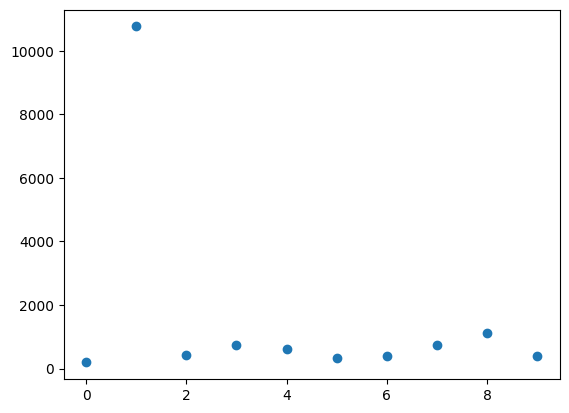

In [30]:
unique_clusters, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique_clusters, counts))
print(cluster_counts)
plt.plot(cluster_counts.keys(), cluster_counts.values(), 'o')

In [ ]:
indices = np.where(clusters == 34)[0]
df_game_item_from_bgg = pd.read_csv('../data/boardgames_ranks.csv') 
for index in indices:
    bgg_id = unique_items[index]
    name = df_game_item_from_bgg[df_game_item_from_bgg['id'].isin([bgg_id])]['name']
    print(name.to_string())

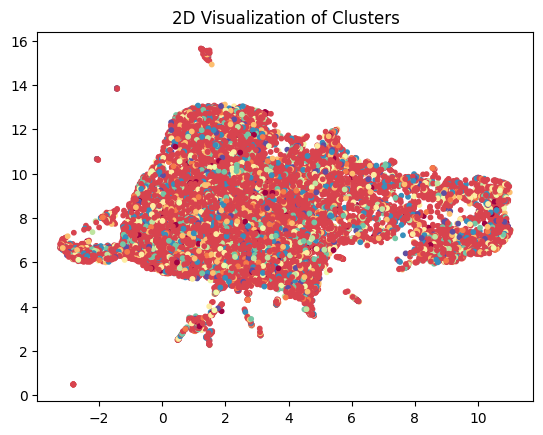

In [29]:
import umap.umap_ as UMAP
import matplotlib.pyplot as plt

plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=clusters, cmap='Spectral', s=10)
plt.title("2D Visualization of Clusters")
plt.show()